<a href="https://colab.research.google.com/github/zunaed/CS_687_DeepLearningCourse/blob/main/LSTM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential
from keras.layers import LSTM ,Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/UCI_HAR_Dataset/train/"
test_path = "/content/drive/MyDrive/UCI_HAR_Dataset/test/"
features_path = "/content/drive/MyDrive/UCI_HAR_Dataset/features.txt"

In [ ]:
features = []
with open(features_path) as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
print("No. of unique features:{}".format(len(set(features))))

No of Features: 561
No. of unique features:477


In [ ]:
labels = {1: 'WALKING', 
          2:'WALKING_UPSTAIRS',
          3:'WALKING_DOWNSTAIRS',
          4:'SITTING',
          5:'STANDING',
          6:'LAYING'}

In [ ]:
re=[]
for i , f in enumerate(features):
    for j in range(i+1 , len(features)):
        if features[i]==features[j] and features[i] not in re:
            re.append(features[i])

In [ ]:
for i , f in enumerate(features):
    features[i] = ''.join(e for e in f if e not in ['(',')' , '-' , ',']) 

In [ ]:
train = pd.read_csv(train_path + "X_train.txt" , delim_whitespace=True ,header=None)
train.columns = features
train['subject'] = pd.read_csv(train_path + 'subject_train.txt' , header=None , squeeze=True)
test = pd.read_csv(test_path + "X_test.txt" , delim_whitespace=True ,header=None)
test.columns = features
test['subject'] = pd.read_csv(test_path + 'subject_test.txt' , header=None , squeeze=True)

In [ ]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [ ]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [ ]:
y_train = pd.read_csv(train_path + 'y_train.txt' , names=['Activity'] , squeeze=True)
y_test = pd.read_csv(test_path + 'y_test.txt' , names=['Activity'] , squeeze=True)

In [ ]:
train['Activity']= y_train
test['Activity'] = y_test
train['ActivityName'] = y_train.map(labels)
test['ActivityName']  = y_test.map(labels)

In [ ]:
print("The number of missing values in Training Data:" , train.isnull().values.sum())
print("The number of missing values in Testing Data:" , test.isnull().values.sum())

The number of missing values in Training Data: 0
The number of missing values in Testing Data: 0


In [ ]:
print("The number of duplicate values in Training Data:" , train.duplicated().sum())
print("The number of duplicate values in Testing Data:" , test.duplicated().sum())

The number of duplicate values in Training Data: 0
The number of duplicate values in Testing Data: 0


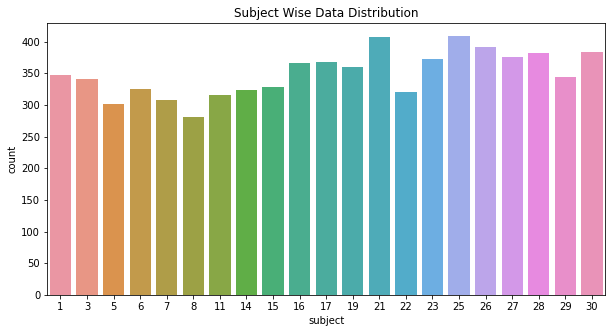

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Subject Wise Data Distribution')
sns.countplot(x='subject' , data=train )
plt.show()

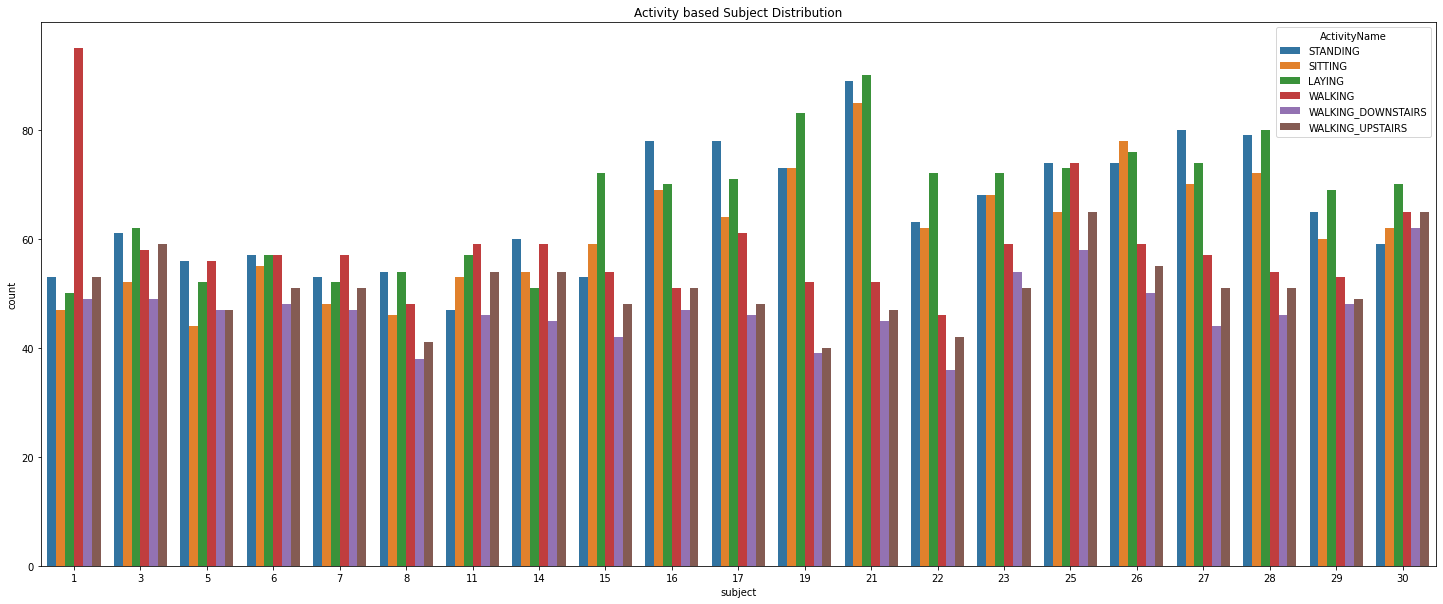

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Activity based Subject Distribution')
sns.countplot(x='subject' , hue='ActivityName', data=train )
plt.show()

In [ ]:
accFeat=[]
for feat in features:
    if feat.find('BodyAcc') != -1 and feat.find('Magmean') !=-1 and feat.find('Freq')==-1:
        accFeat.append(feat)

In [ ]:
def plotFacetGrid(feature, height):
    
    plt.figure(figsize=(10,10))
    facetgrid=sns.FacetGrid(train , hue='ActivityName',height=height,aspect=3)
    facetgrid.map(sns.distplot ,feature, hist=False).add_legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 720x720 with 0 Axes>

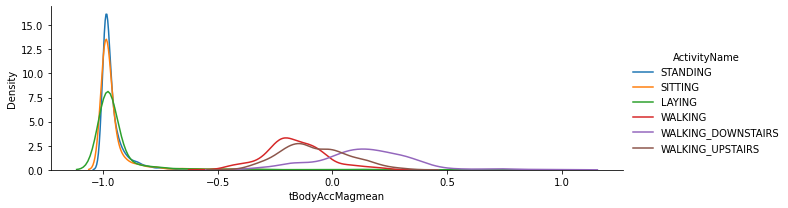

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 720x720 with 0 Axes>

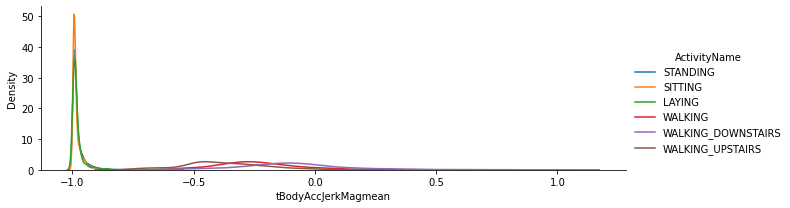

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 720x720 with 0 Axes>

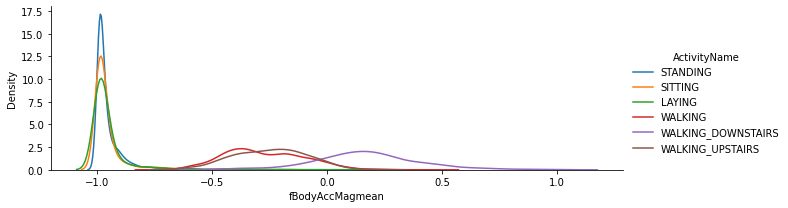

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 720x720 with 0 Axes>

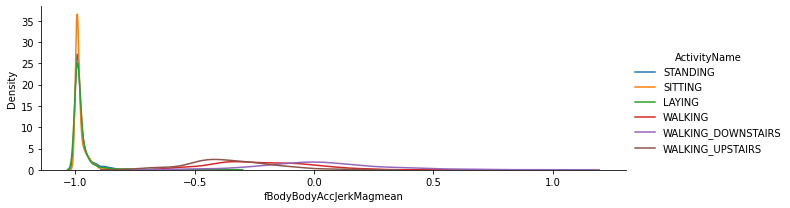

In [ ]:
for f in accFeat:
    plotFacetGrid(f,3) 

In [ ]:
def boxplot(feature , ylabel):
    
    plt.figure(figsize=(5,5))
    sns.boxplot(x='ActivityName', y=feature, data=train , showfliers=False )
    plt.ylabel(ylabel)
    plt.axhline(y=-0.8, xmin=0.1, xmax=0.9,dashes=(5,5), c='g') #line separating both type of activities
    plt.xticks(rotation=90)

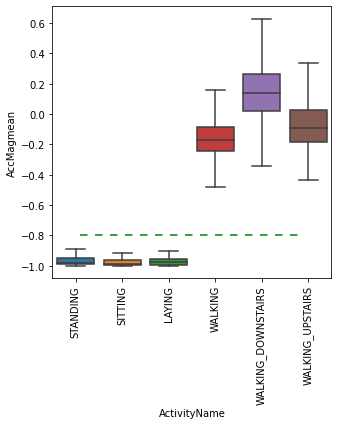

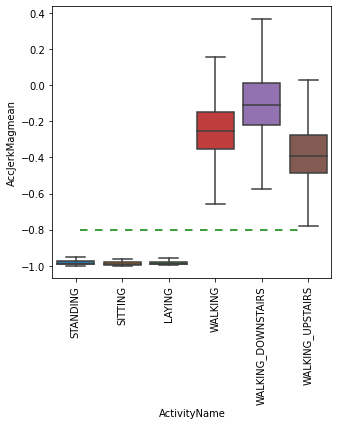

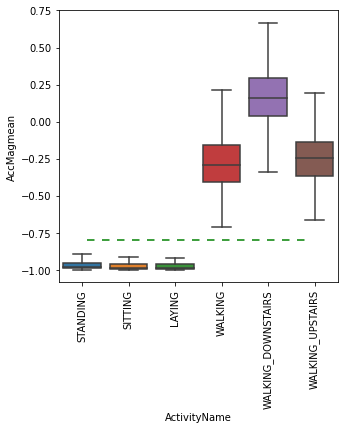

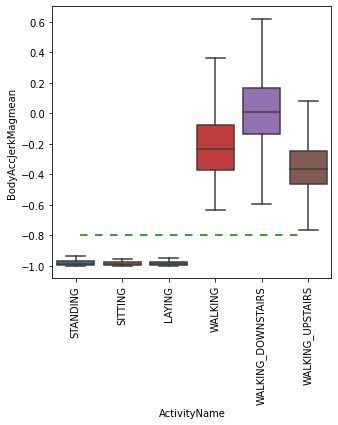

In [ ]:
for f in accFeat:
    boxplot(f , f[5:])

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def plotTsne(X,y,perplexity):
    
    #performing dim reduction
    X_reduce = TSNE(verbose=2, perplexity=perplexity).fit_transform(X)
    
    print('Creating plot for this t-sne visualization..')
    data={'x':X_reduce[:,0],
          'y':X_reduce[:,1],
         'label':y}
    #preparing dataframe from reduced data
    df = pd.DataFrame(data)
    
    #draw the plot
    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
    
    plt.title("perplexity : {}".format(perplexity))
    img_name = 'TSNE_perp_{}.png'.format(perplexity)
    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)
    plt.show()
    print('Done')

In [ ]:
X= train.drop(['ActivityName'],axis=1)
y= train['ActivityName']
perplexity=[2,5,10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 2.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.685862
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 124.7996521, gradient norm = 0.0355348 (50 iterations in 3.332s)
[t-SNE] Iteration 100: error = 104.8479614, gradient norm = 0.0320243 (50 iterations in 2.075s)
[t-SNE] Iteration 150: error = 98.1376038, gradient norm = 

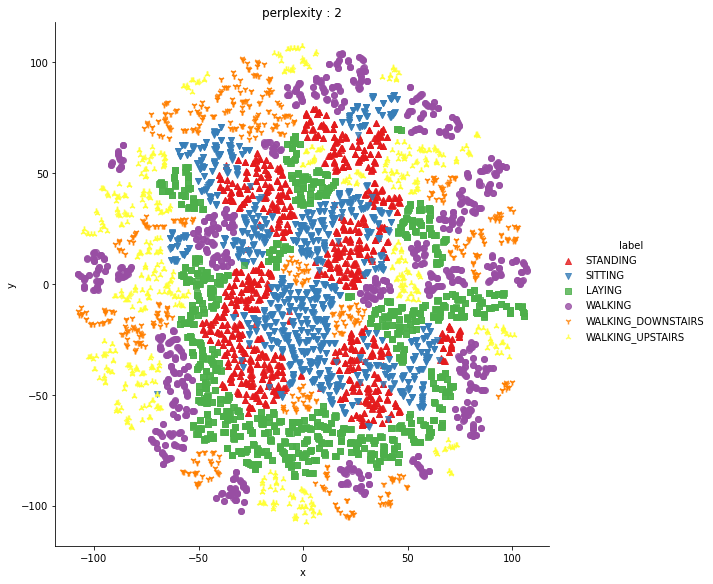

Done
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 1.789s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.127762
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 112.9105148, gradient norm = 0.0399115 (50 iterations in 3.330s)
[t-SNE] Iteration 100: error = 92.9826508, gradient norm = 0.0186935 (50 iterations in 1.944s)
[t-SNE] Iteration 150: error = 86.9125671, gradient norm = 0.0140200 (50 iterations in 1.632s)
[t-SNE] Iteration 200: error = 83.5613708, gradi

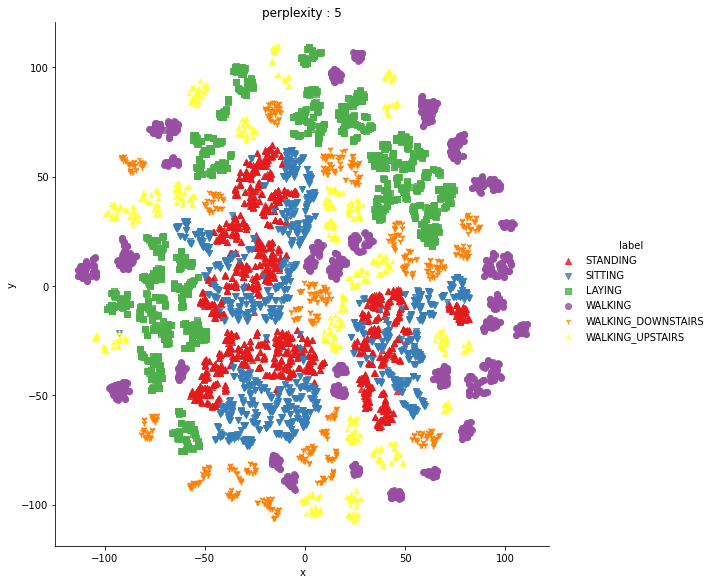

Done
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 1.768s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.357802
[t-SNE] Computed conditional probabilities in 0.112s
[t-SNE] Iteration 50: error = 103.4567795, gradient norm = 0.0348582 (50 iterations in 3.052s)
[t-SNE] Iteration 100: error = 84.0838318, gradient norm = 0.0135784 (50 iterations in 1.969s)
[t-SNE] Iteration 150: error = 78.9202271, gradient norm = 0.0090706 (50 iterations in 1.747s)
[t-SNE] Iteration 200: error = 76.0754547, gradi

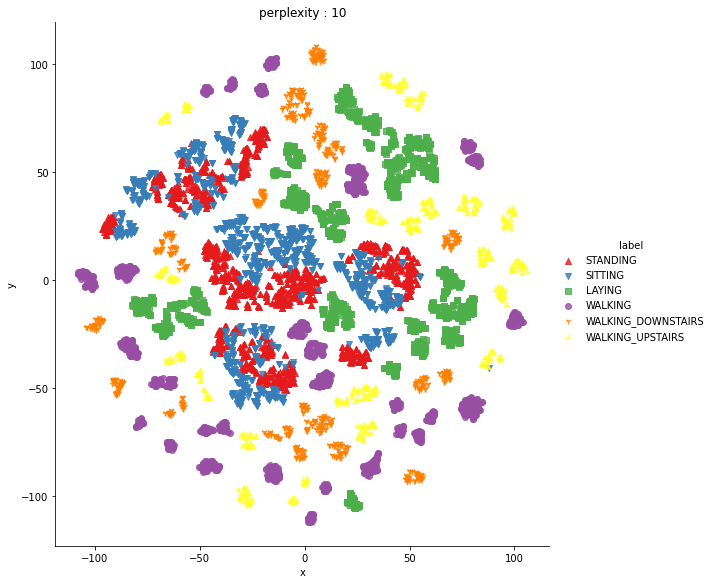

Done


In [ ]:
for p in perplexity:
    plotTsne(X,y,perplexity=p)

In [ ]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [ ]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [ ]:
path= "/content/drive/MyDrive/UCI_HAR_Dataset/"

In [ ]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

"----------------------------LOAD SIGNAL---------------------------------------------"

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = path+subset+'/Inertial Signals/'+signal+'_'+subset+'.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:
"-------------------------CONFUSION MATRIX----------------------------------------------"

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])


In [ ]:
"----------------------------LOAD Y-------------------------------------------------------"



def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = path+subset+'/y_'+subset+'.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values

In [ ]:
"---------------------------------LOAD DATA---------------------------------------------"


def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test


In [ ]:
"---------------------------------COUNT CLASSES--------------------------------------------"

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
epochs = 50
batch_size = 16
n_hidden = 32

In [ ]:
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
#model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid')) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                5376      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) #rmsprop

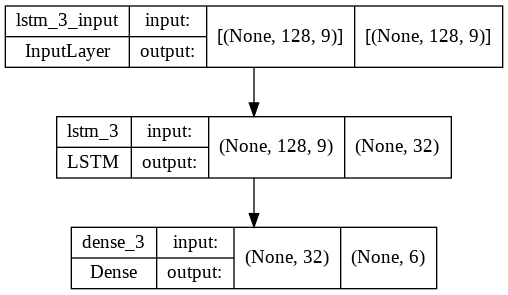

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='LSTMmodel.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/50
460/460 [==============================] - 27s 52ms/step - loss: 1.1265 - accuracy: 0.5340 - val_loss: 1.3946 - val_accuracy: 0.5317
Epoch 2/50
460/460 [==============================] - 23s 51ms/step - loss: 0.6750 - accuracy: 0.7394 - val_loss: 0.6832 - val_accuracy: 0.7520
Epoch 3/50
460/460 [==============================] - 23s 51ms/step - loss: 0.4954 - accuracy: 0.8258 - val_loss: 0.5816 - val_accuracy: 0.8127
Epoch 4/50
460/460 [==============================] - 25s 55ms/step - loss: 0.3520 - accuracy: 0.8822 - val_loss: 0.5149 - val_accuracy: 0.8426
Epoch 5/50
460/460 [==============================] - 23s 51ms/step - loss: 0.2722 - accuracy: 0.9095 - val_loss: 0.4320 - val_accuracy: 0.8585
Epoch 6/50
460/460 [==============================] - 23s 51ms/step - loss: 0.2178 - accuracy: 0.9234 - val_loss: 0.4050 - val_accuracy: 0.8558
Epoch 7/50
460/460 [==============================] - 24s 52ms/step - loss: 0.1982 - accuracy: 0.9279 - val_loss: 0.3991 - val_accuracy:

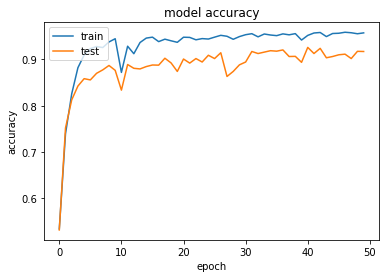

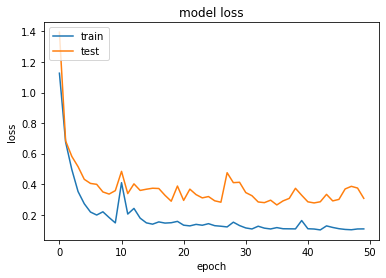

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()